In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import warnings
import os
import sys
import datetime as dt
import cartopy.crs as ccrs
#from cartopy.feature import NaturalEarthFeature
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pandas as pd
import matplotlib as mpl

import matplotlib.ticker as mticker
#warnings.filterwarnings("ignore", category=RuntimeWarning) # ignore runtime warnings; here they arise from attempted operations on all-NaN arrays

/home/ords/crd/ccrn/reo000/mamba_files/envs/mpy12MHW/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
nl = dict(zip( ['CanCM4i', 'COLA-RSMAS-CCSM4', 'GEM-NEMO', 'GFDL-SPEAR', 'NASA-GEOSS2S', 'NCEP-CFSv2', 'CanESM5', 'GEM5.2-NEMO', 'GEM5-NEMO', 'CanCM4i-IC3',],
               [       11,                 11,         11,           11,              8,            9,        11,            11,          11,            11,])) 
modict={'Jacox':['CanCM4i', 'COLA-RSMAS-CCSM4', 'GEM-NEMO', 'GFDL-SPEAR', 
                        'NASA-GEOSS2S', 'NCEP-CFSv2'],
        'CanSIPSv2':['CanCM4i','GEM-NEMO'],
        'CanSIPSv21':['CanCM4i-IC3','GEM5-NEMO'],
        'CanSIPSv3':['CanESM5','GEM5.2-NEMO'],
        'GFDLNASA':[ 'GFDL-SPEAR','NASA-GEOSS2S'],}

In [3]:
basepath='/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW'
clim_years = [1991, 2020]
years=clim_years
mhwdir = basepath+'/mhw/detrended';


In [4]:
dfA=pd.read_csv('figs/dfA.csv',index_col=0)
dfA

year  month        A1_obs         A2_obs  A1_lag0_weighted  \
0   2011      6  2.060850e+05   21489.711322      2.880180e+05   
1   2011      7  0.000000e+00       0.000000      2.933947e+04   
2   2011      8  0.000000e+00  144390.357629      5.678696e+03   
3   2011      9  0.000000e+00       0.000000      1.978140e+04   
4   2011     10  7.590501e+04       0.000000      3.063425e+04   
5   2011     11  8.126808e+04   31014.101246      3.441019e+04   
6   2011     12  3.455419e+04   29285.642426      1.439633e+05   
7   2012      1  2.457302e+05       0.000000      4.558885e+05   
8   2012      2  3.720338e+05       0.000000      5.184486e+05   
9   2012      3  3.376128e+05       0.000000      3.736305e+05   
10  2012      4  6.393009e+05       0.000000      1.214018e+05   
11  2012      5  8.838672e+05   29813.526843      5.933998e+05   
12  2012      6  6.742640e+05  665034.982808      6.633033e+05   
13  2012      7  8.402646e+05  862553.110156      6.653719e+05   
14  2012      8  1.333260e+06  425322.024415      1.052546e+06   
15  2012      9  1.032378e+06  684772.444474      5.586814e+05   
16  2012     10  8.968607e+05   71858.242816      8.389353e+05   
17  2012     11  1.026972e+06  171148.592549      1.213745e+06   
18  2012     12  5.081849e+05   64421.973549      6.229534e+05   
19  2013      1  2.828880e+05  136833.844774      4.343054e+05   
20  2013      2  9.874286e+04   59793.106849      1.019576e+05   
21  2013      3  3.324226e+05  200634.602791      1.671987e+05   
22  2013      4  1.864114e+05  169696.862818      9.844576e+04   
23  2013      5  4.179803e+05   22708.344947      3.522995e+05   

    A2_lag0_weighted   A1_lag0_gt1   A2_lag0_gt1   A1_lag0_gt2   A2_lag0_gt2  \
0       88390.389118  1.783795e+06  1.450559e+06  1.689274e+06  1.256785e+06   
1       36672.125804  7.115408e+05  8.364350e+05  3.587515e+05  6.801313e+05   
2       12555.757776  1.272592e+05  7.638231e+05  4.283488e+04  6.427761e+05   
3        1694.549593  5.163758e+05  3.335108e+05  2.396253e+05  1.730690e+05   
4        2610.680439  8.373867e+05  5.380890e+05  3.874262e+05  4.773184e+05   
5        2113.898475  2.297820e+05  5.540464e+05  1.790942e+05  5.028046e+05   
6         389.791296  7.196042e+05  2.504251e+05  5.552589e+05  2.055343e+05   
7         870.290259  1.274483e+06  7.345234e+04  1.182764e+06  1.525325e+04   
8       21502.129564  1.406308e+06  1.486478e+05  1.313858e+06  1.128801e+05   
9        3281.109665  1.095470e+06  1.117349e+05  9.536021e+05  8.299035e+04   
10       1188.912424  1.005411e+06  5.016265e+04  7.428210e+05  6.927108e+03   
11      64746.690062  1.764801e+06  8.000458e+05  1.676375e+06  5.928902e+05   
12     405413.964894  1.842879e+06  1.865797e+06  1.698386e+06  1.664956e+06   
13     812439.177033  1.688744e+06  2.160123e+06  1.634838e+06  2.148875e+06   
14     399204.064592  1.925002e+06  2.003102e+06  1.897384e+06  1.887594e+06   
15     487724.029490  1.843177e+06  2.112082e+06  1.797443e+06  2.068544e+06   
16     478108.237261  1.860999e+06  2.028084e+06  1.770117e+06  1.897812e+06   
17     346588.579127  1.761799e+06  1.719697e+06  1.726513e+06  1.569735e+06   
18      12993.691092  1.571580e+06  6.069927e+05  1.530019e+06  4.156864e+05   
19      11548.926182  1.154696e+06  5.467557e+05  1.130317e+06  3.996443e+05   
20       5434.493115  5.878409e+05  8.549511e+04  4.755500e+05  5.603854e+04   
21      47842.148842  9.522470e+05  6.735542e+05  7.379389e+05  4.383803e+05   
22     216943.700764  6.558451e+05  1.144434e+06  4.310194e+05  9.288537e+05   
23     182557.566565  1.724821e+06  1.443068e+06  1.555460e+06  1.255811e+06   

    ...  A1_lag8_gt36  A2_lag8_gt36  A1_lag8_gt37  A2_lag8_gt37  A1_lag8_gt38  \
0   ...           0.0           0.0           0.0           0.0           0.0   
1   ...           0.0           0.0           0.0           0.0           0.0   
2   ...           0.0           0.0           0.0           0.0           0.0   
3   ...           0.0       

In [15]:
cmap = mpl.colormaps['jet']
colors = cmap(np.linspace(0, 1, 40))
styles=['-','--','-.',':']

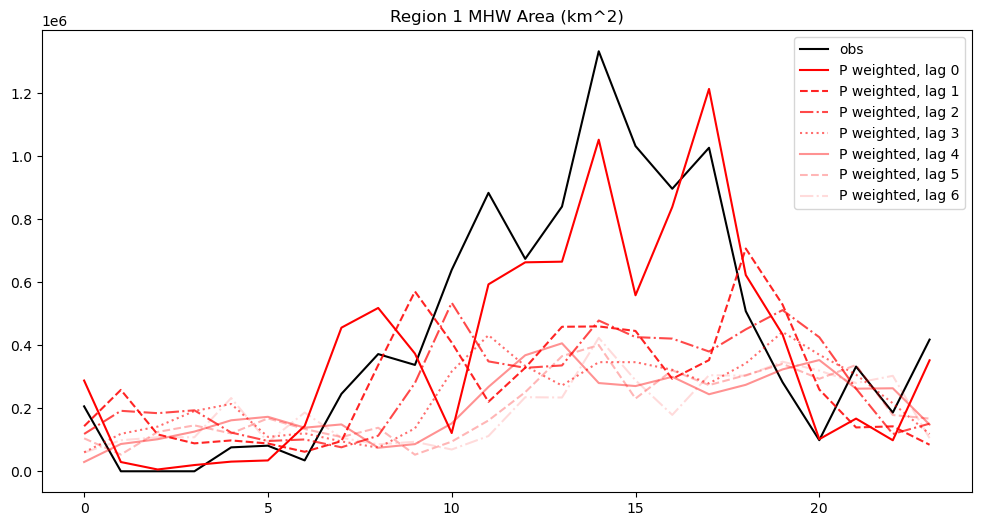

In [16]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
ax.plot(dfA.A1_obs,'k-',label='obs')
for il in range(0,7):
    ax.plot(dfA[f'A1_lag{il}_weighted'],'r',linestyle=styles[il%len(styles)],alpha=1-il/7,label=f'P weighted, lag {il}')
ax.set_title('Region 1 MHW Area (km^2)')
ax.legend()
fig.savefig('figs/MHWArea_Region1_weighted.png',bbox_inches='tight')

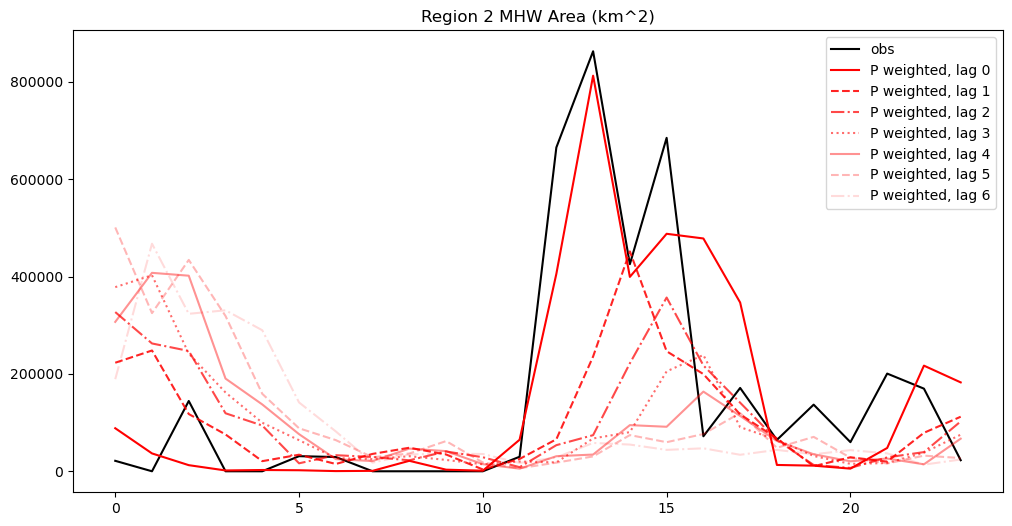

In [18]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
ax.plot(dfA.A2_obs,'k-',label='obs')
for il in range(0,7):
    ax.plot(dfA[f'A2_lag{il}_weighted'],'r',linestyle=styles[il%len(styles)],alpha=1-il/7,label=f'P weighted, lag {il}')
ax.set_title('Region 2 MHW Area (km^2)')
ax.legend()
fig.savefig('figs/MHWArea_Region2_weighted.png',bbox_inches='tight')

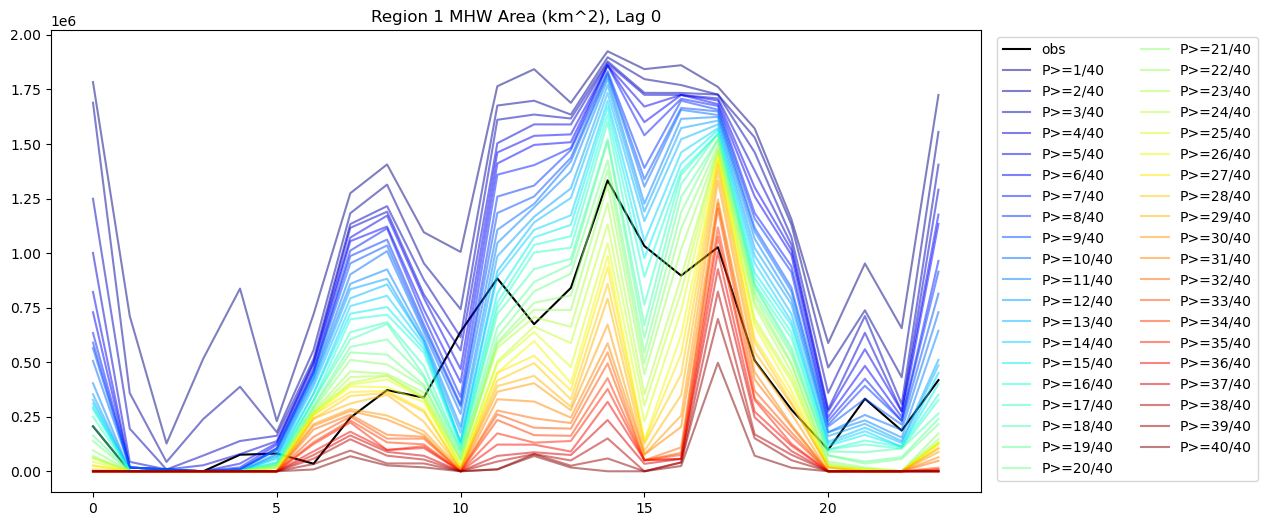

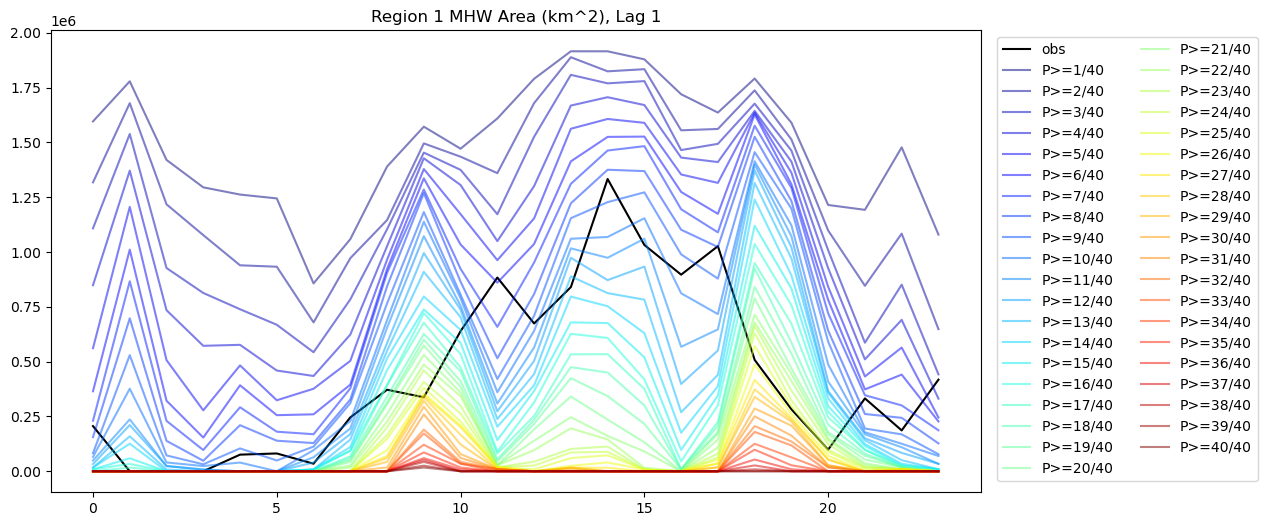

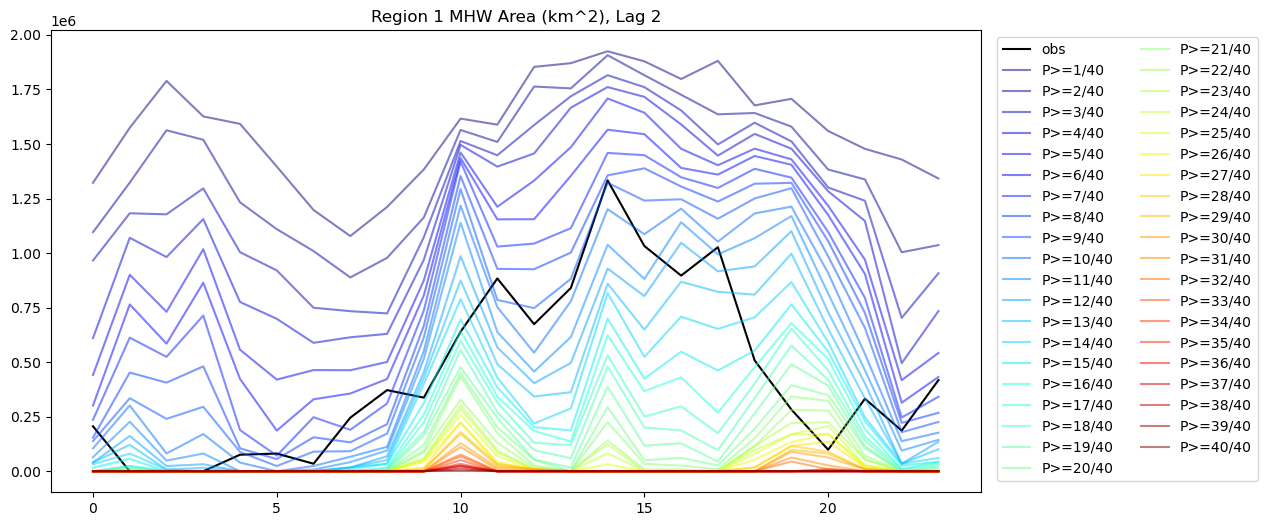

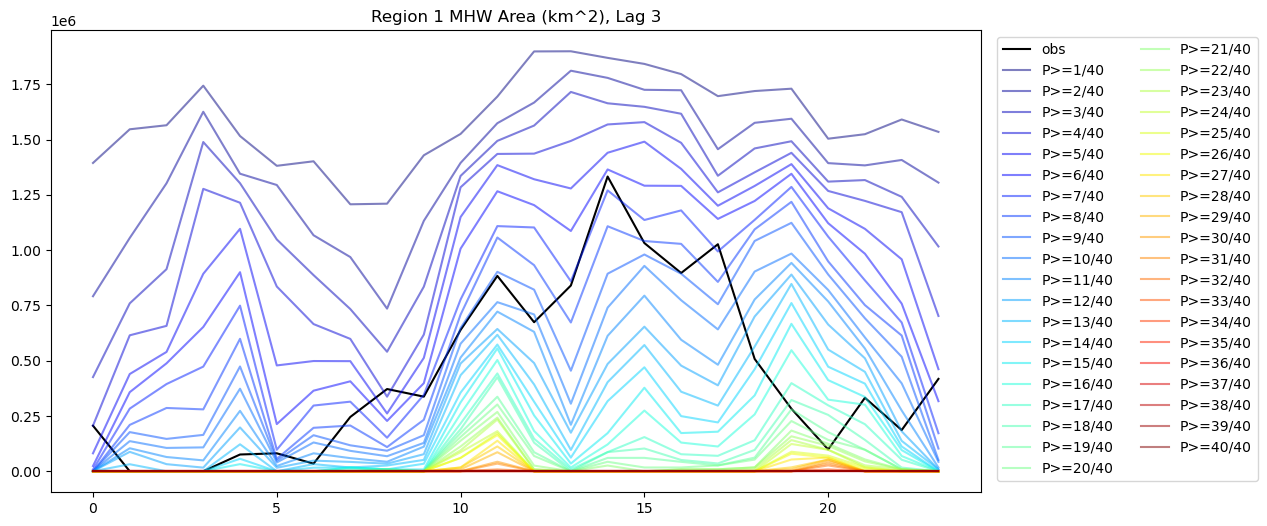

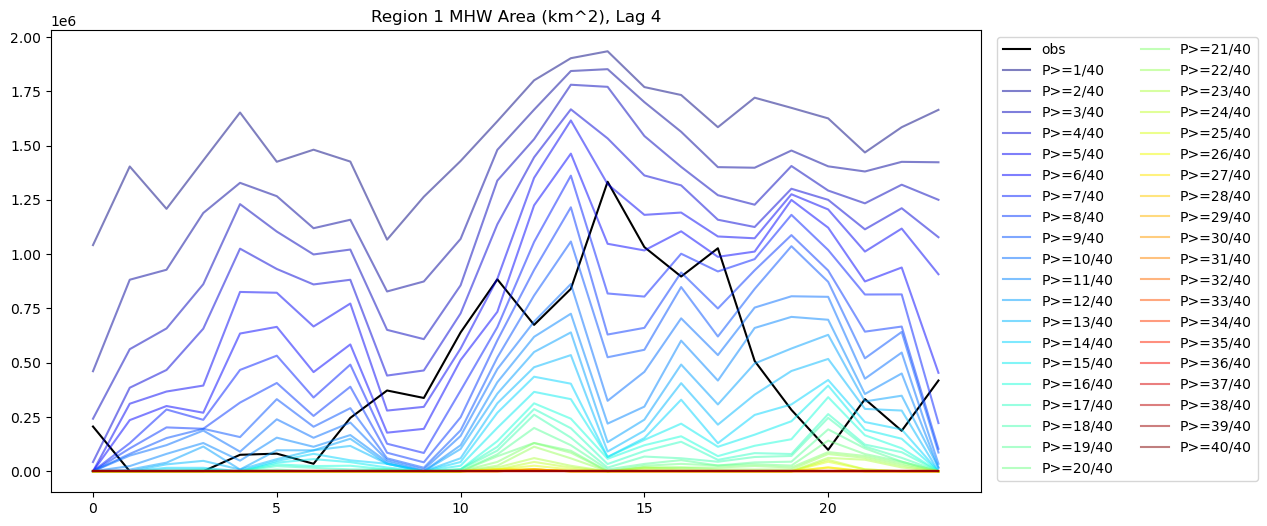

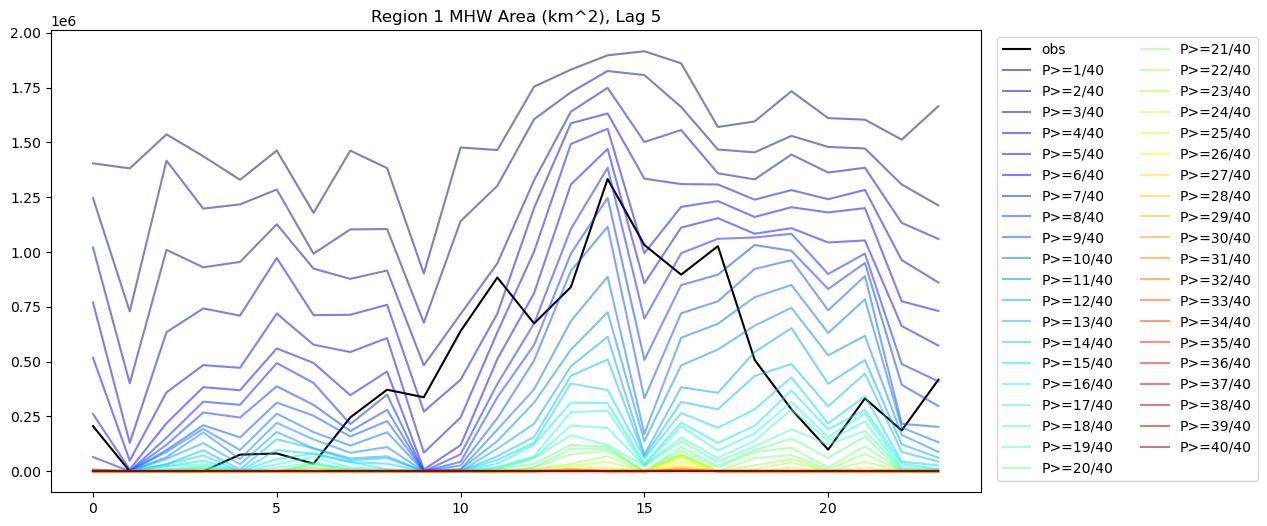

In [8]:
for lag in range(0,6):
    fig,ax=plt.subplots(1,1,figsize=(12,6))
    ax.plot(dfA.A1_obs,'k-',label='obs')
    for ii in range(1,41):
        ax.plot(dfA[f'A1_lag{lag}_gt{ii}'],color=colors[ii-1],alpha=.5,label=f'P>={ii}/40')
    ax.set_title(f'Region 1 MHW Area (km^2), Lag {lag}')
    ax.legend(ncols=2,bbox_to_anchor=[1.01,1])
    fig.savefig(f'figs/MHWAreaByPThresh_Region1_lag{lag}.png',bbox_inches='tight')

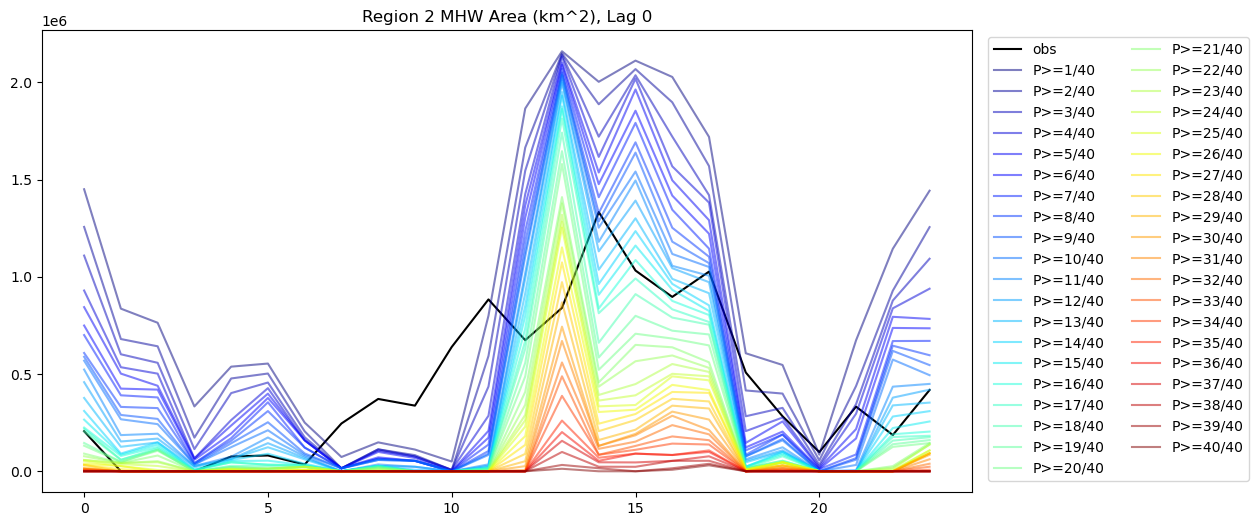

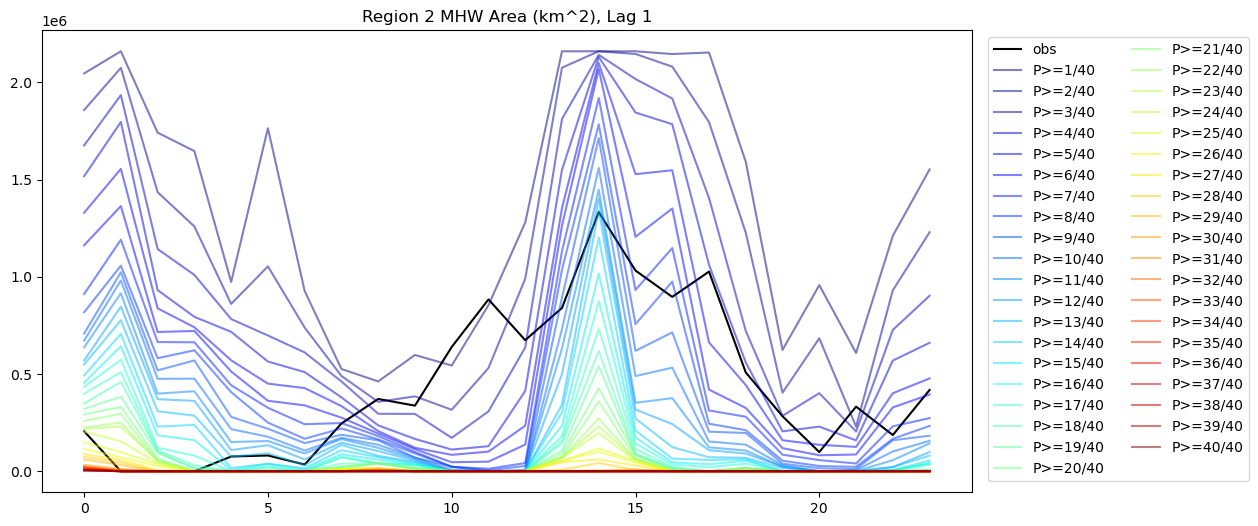

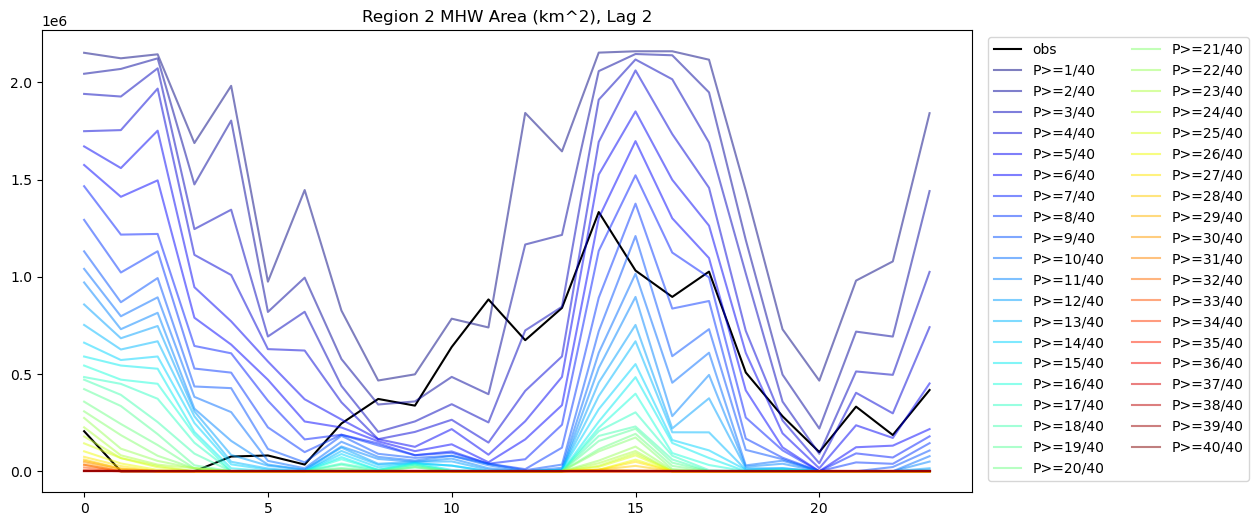

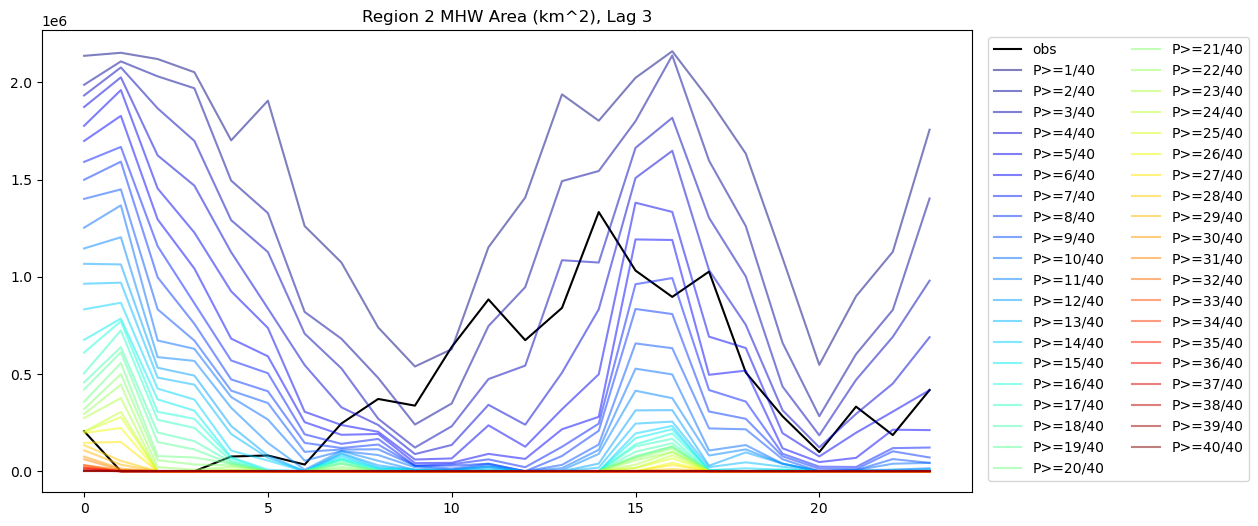

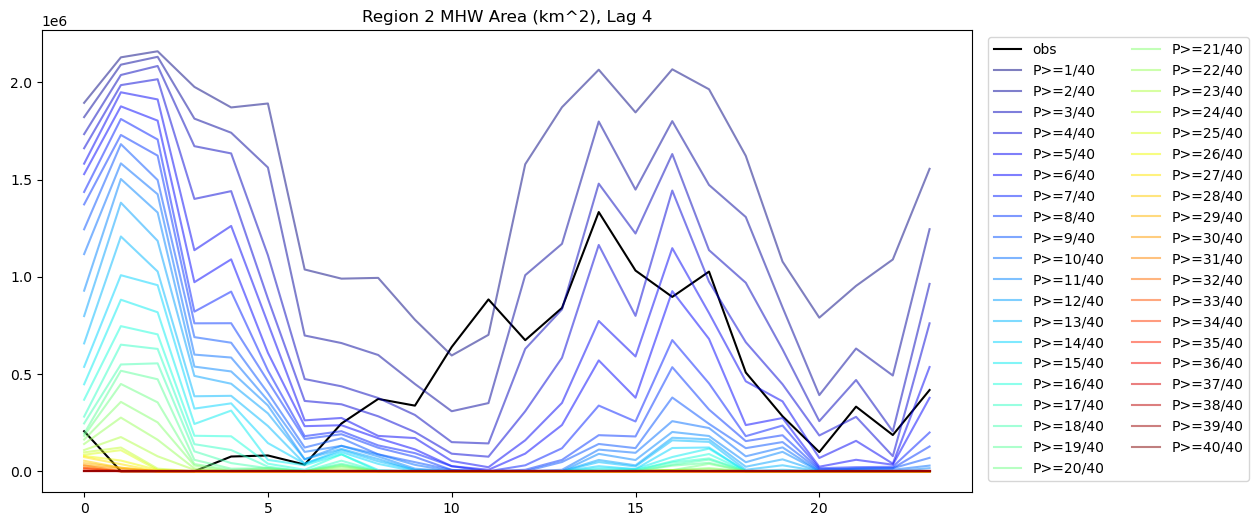

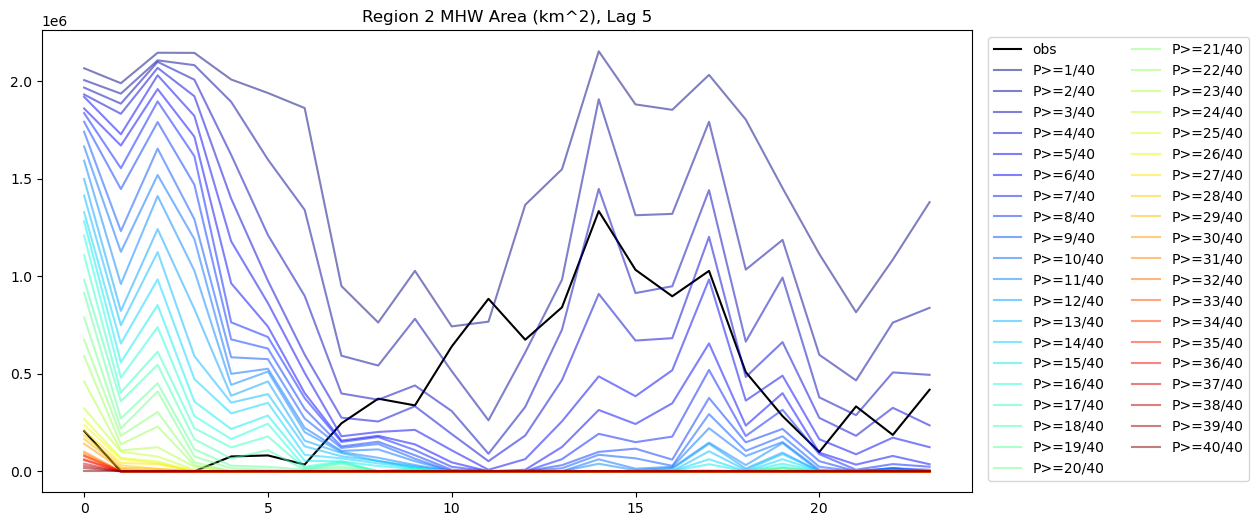

In [9]:
for lag in range(0,6):
    fig,ax=plt.subplots(1,1,figsize=(12,6))
    ax.plot(dfA.A1_obs,'k-',label='obs')
    for ii in range(1,41):
        ax.plot(dfA[f'A2_lag{lag}_gt{ii}'],color=colors[ii-1],alpha=.5,label=f'P>={ii}/40')
    ax.set_title(f'Region 2 MHW Area (km^2), Lag {lag}')
    ax.legend(ncols=2,bbox_to_anchor=[1.01,1])
    fig.savefig(f'figs/MHWAreaByPThresh_Region2_lag{lag}.png',bbox_inches='tight')